# Física do Movimento

## Capítulo 4 - Lançamento oblíquo

---
### Inicialização

Nesta atividade vamos implementar um modelo de lançamento oblíquo de esferas de mesmo tamanho, porém compostas de materiais distintos:
- Ferro
- Madeira
- Isopor
- "Balão de ar" (plástico/ar)
- "Balão de hélio" (plástico/hélio)

Antes de começar, execute o código abaixo para importar todas as bibliotecas necessárias.

In [1]:
# Importa bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.integrate import odeint

---
### Parâmetros e condições iniciais

Vamos começar definindo todos os parâmetros e condições iniciais, que serão comuns às três iterações.

#### Parâmetros

Vamos assumir que as esferas possuem um raio ($r$) de $15cm$, isto é:
- $r = 0,15m$

Os valores das densidades ($\rho$) do ferro, madeira, isopor, "balão de ar" (plástico/ar) e "balão de hélio" (plástico/hélio) são facilmente obtidos na literatura:
- $\rho_f = 7.870 kg/m^3$
- $\rho_m = 600 kg/m^3$
- $\rho_i = 75 kg/m^3$
- $\rho_{ba} = 1,5 kg/m^3$
- $\rho_{bh} = 0,5 kg/m^3$

Da mesma forma, o valor da aceleração da gravidade ($g$), densidade do ar ($\rho_a$) e coeficiente de arrasto ($C_d$) de uma esfera também podem ser obtidos na literatura:
- $g = 9,81m/s^2$
- $\rho_a = 1,225 kg/m^3$
- $C_d = 0,47$. 

Abaixo, definimos as varíaveis para todos os parâmetros, incluindo o cálculo da área da seção transversal ($A$) e do volume ($V$) da esfera (que serão úteis para o cálculo da força de arrasto e da massa das esferas, mais adiante).

In [2]:
# Implemente seu código do item 0a abaixo

# Definição dos parâmetros
r = 0.15               # Raio da esfera [m]
Cd = 0.47              # Coeficiente de arrasto da esfera [adimensional]
rho_f = 7870           # Desnidade do ferro [kg/m3]
rho_m = 600            # Densidade da madeira [kg/m3]
rho_i = 75             # Densidade do isopor [kg/m3]
rho_ba = 1.5           # Densidade do "balão" [kg/m3]
rho_bh = 0.5           # Densidade do "balão" [kg/m3]
rho_a = 1.225          # Densidade do ar [kg/m3]
g = 9.81               # Aceleração da gravidade [m/s2]

# Cálculo de parâmetros
A = pi*r**2       # Área da secção da esfera [m2]
V = (4/3)*pi*r**3 # Volume da esfera [m3]

# Lista de densidades e materiais
RHO = [rho_f,rho_m,rho_i,rho_ba,rho_bh]
NOMES = ['Ferro','Madeira','Isopor','Balão de ar','Balão de hélio']

#### Condições iniciais

As esferas serão lançadas da origem com velocidade inicial ($v_0$) de $20m/s$ e ângulo inicial ($\alpha_0$) de $45^{\circ}$. No código abaixo, definimos as condições iniciais $x_0$, $y_0$, $v_{x_0}$ e $v_{y_0}$ em função delas. Para isso, você precisamos utilizar as funções `sin` e `cos` (estas funções trabalham com radianos e não com graus). Para a conversão de graus em radianos, utilizamos a função `radians`, do módulo `math`.

Estamos também definindo a lista de tempo de $0s$ a $5s$ com $\Delta t=10^{-3}$ $s$

In [3]:
# Implemente seu código do item 0b abaixo

# Condições iniciais
v0 = 20              # Velocidade inicial [m/s]
alpha0 = 45*pi/180   # Ângulo inicial [rad]
x0 = 0               # Posição em x inicial [m]
y0 = 0               # Posição em y inicial [m]
vx0 = v0*cos(alpha0) # Velocidade em x inicial [m/s]
vy0 = v0*sin(alpha0) # Velocidade em y inicial [m/s]
CondIniciais = [x0,y0,vx0,vy0]

# Delta t e Lista de tempo
dt = 1e-3
T = np.arange(0,5,dt)

#### Implementação

A seguir vamos implementar as equações diferenciais do movimento em uma função denominada **TaxasDeVariação**.

In [4]:
# Implementação das equações diferenciais
def TaxasDeVariação(Variaveis, massa):
    # Desagrupa lista
    x = Variaveis[0]
    y = Variaveis[1]
    vx = Variaveis[2]
    vy = Variaveis[3]  
    m = massa
    # Calcula as taxas de variação
    dxdt = vx
    dydt = vy    
    dvxdt = (1/m)*(-(1/2)*rho_a*A*Cd*vx*sqrt(vx**2+vy**2))
    dvydt = (1/m)*(-m*g-(1/2)*rho_a*A*Cd*vy*sqrt(vx**2+vy**2)+rho_a*V*g)
    # Verifica se a esfera já atingiu o chão (caso positivo, nada mais pode variar)
    if y < 0:
        dxdt = 0
        dydt = 0
        dvxdt = 0
        dvydt = 0  
    # Agrupe lista com as taxas de variação
    Taxas = [dxdt, dydt, dvxdt, dvydt]
    # Retorna lista com as taxas de variação
    return Taxas

#### Item 3b

Utilizando a função que você implementou no item anterior, resolva o sistema de equações diferenciais utilizando a função `odeint` para cada uma das esferas, da mesma forma que você fez no **Item 1b** e no **Item 2b**.

Em seguida, plote a trajetória, isto é, um gráfico de $x(t)$ por $y(t)$, de todas as esferas em uma mesma figura.

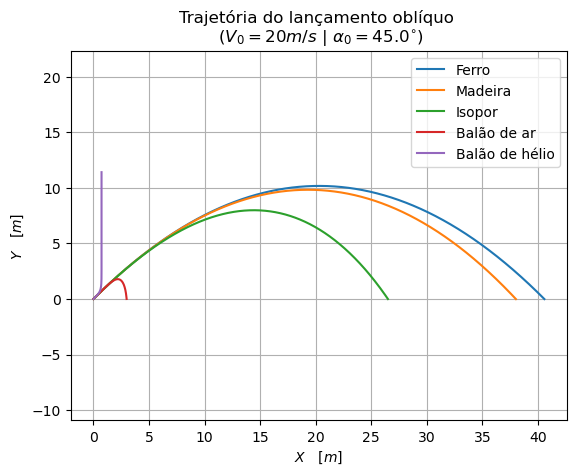

In [5]:
# Implementando uma função que executa o métido do Euler
def MetodoDeEuler(CondIniciais, T, massa):
    #listas com as funções paramétricas
    X=[0]*len(T)
    Y=[0]*len(T)
    Vx=[0]*len(T)
    Vy=[0]*len(T)
    #inicia condições iniciais das variáveis    
    X[0]=CondIniciais[0]
    Y[0]=CondIniciais[1]
    Vx[0]=CondIniciais[2]
    Vy[0]=CondIniciais[3]
    #loop que implementa o método de Euler
    for i in range(0, len(T)-1):
        #obtém as taxas de variação no instante
        Variaveis=[X[i], Y[i], Vx[i], Vy[i]]
        Taxas = TaxasDeVariação(Variaveis, massa)
        dxdt = Taxas[0]
        dydt = Taxas[1]
        dvxdt = Taxas[2]
        dvydt = Taxas[3]
        X[i+1]=X[i]+dxdt*dt
        Y[i+1]=Y[i]+dydt*dt
        Vx[i+1]=Vx[i]+dvxdt*dt
        Vy[i+1]=Vy[i]+dvydt*dt
        
    Solucao = [X, Y, Vx, Vy]
    
    return Solucao



# Utiliza a função odeint 3 vezes, uma para cada massa
for i in range(len(RHO)):
    Solucao = MetodoDeEuler(CondIniciais, T, RHO[i]*V)
    X = Solucao[0]
    Y = Solucao[1]
    plt.plot(X,Y,label=NOMES[i])
    
# Configura gráfico
plt.title('Trajetória do lançamento oblíquo \n ($V_0 ='+str(v0)+'m/s$ | $\\alpha_0 = '+str(alpha0*180/pi)+'^{\circ}$)')
plt.axis('equal')
plt.xlabel('$X \quad [m]$')
plt.ylabel('$Y \quad [m]$')
plt.legend()
plt.grid(True)
plt.show()

Como era de se esperar, agora o balão de hélio está subindo. Caso isso não ocorra no seu código, volte na implementação do seu modelo e verifique se você não cometeu nenhum erro.